In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [238]:
data = pd.read_csv('internet_service_churn.csv')
data.head()


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [239]:
df = data.copy()

print(df.shape)
print(df.isna().sum())#check Nan values

(72274, 11)
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


## Обробка відсутніх значень: Заповнення або видалення

### Analyze reamining_contract 

In [240]:
#change all NaN to '0.00'
if "reamining_contract" in df.columns:
    df["reamining_contract"] = df["reamining_contract"].replace(np.nan, 0.00)

#Filter where churn == 1
churn_1_rows = df[df["churn"] == 1]
    
total_churn_1 = len(churn_1_rows)
    
count_zero_reamining_contract = (df["reamining_contract"] == 0.00).sum()
    

percentage = (count_zero_reamining_contract / total_churn_1) * 100
print(f"Percentage where churn == 1 and remaining_contract == NaN: {percentage:.2f}%")


Percentage where churn == 1 and remaining_contract == NaN: 94.72%


It can be concluded that in 95% of cases, if the "churn" column (churn data) equals 1, the "reamining_contract" will be either 0.00 or NaN. Therefore, I believe that "reamining_contract" can be removed. Additionally, the "id" column does not provide any useful information for our purposes.

### Analyze download_avg та upload_avg  

In [241]:
filtered_row_nan = df[df["download_avg"].isna() | df["upload_avg"].isna()]
print(len(filtered_row_nan))

percentage_nan = (len(filtered_row_nan) / len(df)) * 100

print(f'Percentage of rows where download_avg or upload_avg is NaN: {percentage_nan:.2f}%')


381
Percentage of rows where download_avg or upload_avg is NaN: 0.53%


Conclusion: Due to the small percentage (0.53%) of rows where download_avg or upload_avg are NaN, I believe it would be more appropriate to remove these rows rather than replacing them

In [242]:
df = df.dropna(subset=["download_avg", "upload_avg"])
columns_to_drop = ["reamining_contract", "id"]
df = df.drop(columns=columns_to_drop, errors='ignore')
print(df.isna().sum())

print(df.shape)

df.head(10)

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64
(71893, 9)


,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0,8.4,2.3,0,0
1,0,0,8.22,0,0,0.0,0.0,0,1
2,1,0,8.91,16,0,13.7,0.9,0,1
3,0,0,6.87,21,1,0.0,0.0,0,1
4,0,0,6.39,0,0,0.0,0.0,0,1
5,1,1,11.94,32,0,69.4,4.0,0,0
6,0,0,8.96,18,0,21.3,2.0,0,1
7,0,0,5.48,14,1,0.0,0.0,0,1
8,0,0,8.54,0,0,0.0,0.0,0,1
9,0,0,8.33,0,0,0.0,0.0,0,1


## Кодування категоріальних змінних: One-Hot Encoding або Label Encoding

В нашим випадку катогорійні змінні (is_tv_subscriber, is_movie_package_subscriber) мают бінарні значення. З цього приводу можна не кодувати значення з One-Hot Encoding або Label Encoding

## Нормалізація ознак: Стандартизація.

### Removing Outliers Using Standard Deviation

In [243]:
columns_to_filter = ["subscription_age", "bill_avg", "service_failure_count", "download_avg", "upload_avg", "download_over_limit"]

for column in columns_to_filter:
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


### Візаульне відображення 

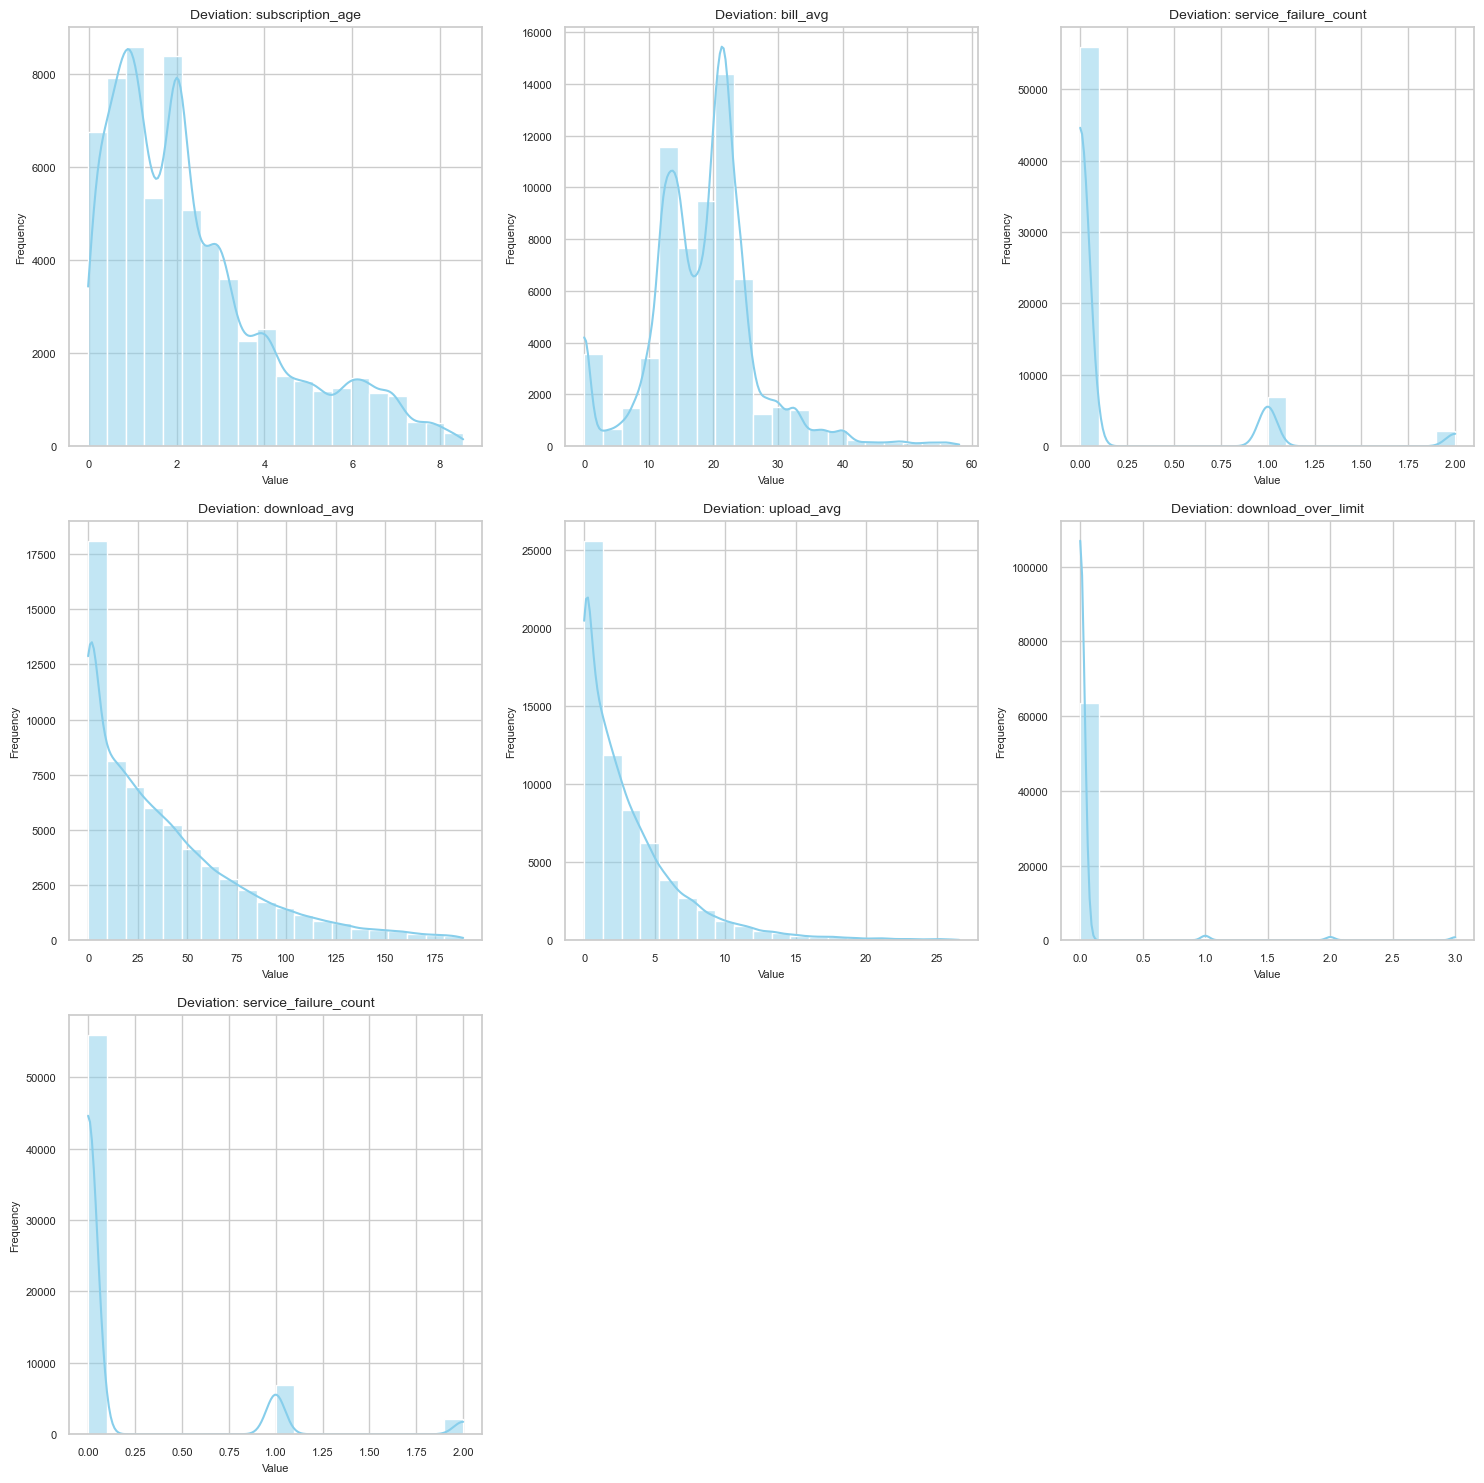

In [245]:
columns_to_filter = ["subscription_age", "bill_avg", "service_failure_count", "download_avg", "upload_avg", "download_over_limit", "service_failure_count"]

sns.set(style="whitegrid")  

n_rows = (len(columns_to_filter) + 2) // 3

plt.figure(figsize=(15, 5 * n_rows))


for i, column_name in enumerate(columns_to_filter):
    plt.subplot(n_rows, 3, i + 1)  
    column_data = df[column_name].dropna()  
    sns.histplot(column_data, kde=True, color="skyblue", bins=20)  
    plt.title(f"Deviation: {column_name}", fontsize=10)
    plt.xlabel("Value", fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)


plt.tight_layout()

plt.show()


### Стандартизація в залежності від розподілу

In [ ]:
columns_scaling = {
    "MinMaxScaler": ["is_tv_subscriber", "is_movie_package_subscriber", "bill_avg", "subscription_age"],
    "RobustScaler": ["service_failure_count", "download_over_limit"]
}

scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "StandardScaler": StandardScaler()
}

for scaler_name, columns in columns_scaling.items():
    scaler = scalers[scaler_name] 
    df[columns] = scaler.fit_transform(df[columns]) 


In [249]:
churn_counts = df['churn'].value_counts()
print(churn_counts)

df

churn
1    36003
0    29081
Name: count, dtype: int64


,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,0.0,0.0,0.963743,0.000000,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.805848,0.362069,1.0,0.0,0.0,0.0,1
4,0.0,0.0,0.749708,0.000000,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.643275,0.241379,1.0,0.0,0.0,0.0,1
9,0.0,0.0,0.976608,0.000000,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
72269,1.0,1.0,0.012865,0.000000,0.0,0.0,0.0,0.0,1
72270,1.0,0.0,0.009357,0.017241,0.0,0.8,0.0,0.0,1
72271,1.0,0.0,0.004678,0.000000,0.0,1.5,0.2,0.0,1
72272,0.0,0.0,0.003509,0.000000,0.0,0.0,0.0,0.0,1
